In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import wilcoxon


In [28]:
endresults_app3_vstruct = np.load('./results/synthetic/a/avg-best-endresults-app3-vstruct.npy',allow_pickle=True)
endresults_app3_vstruct_nopen = np.load('./results/synthetic/c/avg-best-endresults-app3-nopenalty-vstruct.npy',allow_pickle=True)

In [29]:
def avg_distance1(results):
    dis = 0.0
    n = len(results)
    for i in range(n):
        dis += results[i]['distance'].item()
    return dis/n

def avg_jsd1(results):
    jsd = 0.0
    n = len(results)
    for i in range(n):
        jsd += results[i]['jsd'].item()
    return jsd/n

def sdt_distance1(results):
    n = len(results)
    dis = np.zeros((n))
    for i in range(n):
        tmp = results[i]['distance'].item()
        dis[i] = tmp
    return np.std(dis,axis=0)

def sdt_jsd1(results):
    n = len(results)
    jsd = np.zeros((n))
    for i in range(n):
        jsd[i] = results[i]['jsd'].item()
    return np.std(jsd,axis=0)

In [30]:

avg_jsd = avg_jsd1(endresults_app3_vstruct)
jsd_sd = sdt_jsd1(endresults_app3_vstruct)

avg_dist = avg_distance1(endresults_app3_vstruct)
dist_sd = sdt_distance1(endresults_app3_vstruct)

avg_jsd_ablated = avg_jsd1(endresults_app3_vstruct_nopen)
jsd_ablated_sd = sdt_jsd1(endresults_app3_vstruct_nopen)

avg_dist_ablated = avg_distance1(endresults_app3_vstruct_nopen)
dist_ablated_sd = sdt_distance1(endresults_app3_vstruct_nopen)

print('${:.2f}\pm{:.2f}$ & ${:.2f}\pm{:.2f}$'.format(avg_dist,dist_sd,avg_jsd,jsd_sd))
print('${:.2f}\pm{:.2f}$ & ${:.2f}\pm{:.2f}$'.format(avg_dist_ablated,dist_ablated_sd,avg_jsd_ablated,jsd_ablated_sd))

$3.00\pm1.34$ & $0.72\pm0.08$
$5.00\pm2.41$ & $0.68\pm0.15$


In [31]:
def test(x,y,label=None):
    print('Statistical test for {0}'.format(label))
    try:
        print(wilcoxon(x,y))
    except Exception as e:
        print(e)

In [32]:
metrics = ['distance','jsd']

for m in metrics:
    app1 = [endresults_app3_vstruct[i][m].item() for i in range(len(endresults_app3_vstruct))]
    app2 = [endresults_app3_vstruct_nopen[i][m].item() for i in range(len(endresults_app3_vstruct_nopen))]

    test(app1,app2,m)

Statistical test for distance
WilcoxonResult(statistic=2.5, pvalue=0.04734500208525525)
Statistical test for jsd
WilcoxonResult(statistic=15.0, pvalue=0.6744240722352938)


/Users/matedravucz/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/matedravucz/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [33]:
endresults_app3_extended = np.load('./results/synthetic/a/avg-best-endresults-app3-extended.npy',allow_pickle=True)
endresults_app3_extended_nopen = np.load('./results/synthetic/c/avg-best-endresults-app3-nopenalty-extended.npy',allow_pickle=True)


In [34]:

extended_alphas = {'Smoking_': np.array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 1]]),
 'Tar_': np.array([[1, 1, 0],
        [0, 0, 1]]),
 'Cancer_': np.array([[1, 0],
        [0, 1]])}


In [35]:
smoking = endresults_app3_extended[4]['normalised_alphas']['Smoking_']
smoking_nopen = endresults_app3_extended_nopen[4]['normalised_alphas']['Smoking_']


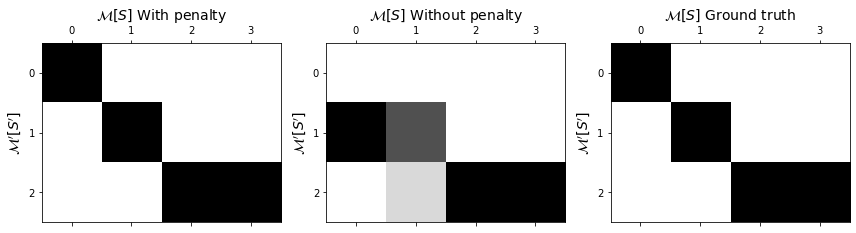

In [36]:
fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=1, ncols=3, tight_layout=True,figsize=(12, 4))

ax0.matshow(smoking, cmap='Greys')
ax0.set_ylabel("$\mathcal{M}^\prime[S^\prime]$",size=14)
ax0.set_title("$\mathcal{M}[S]$ With penalty",size=14)

ax1.matshow(smoking_nopen, cmap='Greys')
ax1.set_ylabel("$\mathcal{M}^\prime[S^\prime]$",size=14)
ax1.set_title("$\mathcal{M}[S]$ Without penalty",size=14)

ax2.matshow(extended_alphas['Smoking_'], cmap='Greys')
ax2.set_ylabel("$\mathcal{M}^\prime[S^\prime]$",size=14)
ax2.set_title("$\mathcal{M}[S]$ Ground truth",size=14)

plt.show()